# Cuaderno con el sistema borroso para calcular la probabilidad de sustitución

In [1]:
import numpy as np
import skfuzzy as fuzzk
from skfuzzy import control as ctrl
import pandas as pd

In [2]:
EVENTS_DATASET_FILE_DIR = '../../datasets/fuzzy-study/arrojeria_section_events.csv'

In [3]:
pd.options.display.max_columns = None

In [4]:
events = pd.read_csv(EVENTS_DATASET_FILE_DIR,index_col=0)
events

,duration,foul_receives,fouls,lost_balls,goals,assists,shots_failed,7m_suspensions_provoke,7m_suspensions,2_min,scoring,hr_low_percentage,hr_medium_percentage,hr_high_percentage,hr_max_percentage,al_low_percentage,al_medium_percentage,al_high_percentage,al_max_percentage
0,547,0,0,1,0,4,0,0,0,0,3,0.0,0.00,2.75,97.25,68.81,18.35,5.05,7.80
1,680,1,4,0,2,1,0,1,0,0,5,0.0,0.00,12.87,87.13,43.75,16.54,31.25,8.46
2,24,0,0,0,0,0,0,0,0,0,0,0.0,0.00,100.00,0.00,10.00,60.00,30.00,0.00
3,160,0,1,0,0,1,0,0,0,0,1,0.0,0.00,100.00,0.00,9.38,17.19,50.00,23.44
4,567,1,2,2,0,1,0,0,0,0,0,0.0,11.89,45.37,42.73,31.28,18.50,31.28,18.94
5,389,0,0,0,0,0,0,0,0,0,0,0.0,100.00,0.00,0.00,44.87,25.64,21.15,8.33
6,499,0,0,1,0,0,0,0,0,0,-1,0.0,93.00,7.00,0.00,25.50,21.00,39.50,14.00


### Antecedentes

Se definen los antecedentes

In [5]:
scoring = ctrl.Antecedent(np.arange(-3,6,1), 'scoring')
activity = ctrl.Antecedent(np.arange(0, 100, 1), 'activity')

### Consecuente

Se define el consecuente

In [6]:
substitute_prob = ctrl.Consequent(np.arange(0,9.5,0.5), 'substitute_prob')

Se definen las funciones de pertenecias

In [7]:
scoring['low'] = fuzzk.trapmf(scoring.universe, [-3, -3, -2, 1])
scoring['mid'] = fuzzk.trimf(scoring.universe, [-2, 1, 4])
scoring['high'] = fuzzk.trapmf(scoring.universe, [1, 4, 5, 5])

activity['low'] = fuzzk.trimf(activity.universe, [0, 0, 50])
activity['mid'] = fuzzk.trimf(activity.universe, [10, 50, 90])
activity['high'] = fuzzk.trimf(activity.universe, [50, 100, 100])

substitute_prob['low'] = fuzzk.trapmf(substitute_prob.universe, [0, 0, 1,4.5])
substitute_prob['mid'] = fuzzk.trimf(substitute_prob.universe, [2, 4.5, 7])
substitute_prob['high'] = fuzzk.trapmf(substitute_prob.universe, [4.5, 8, 9, 9])

/home/jvillamor10/.local/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/home/jvillamor10/.local/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/home/jvillamor10/.local/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


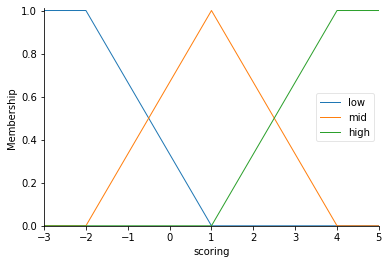

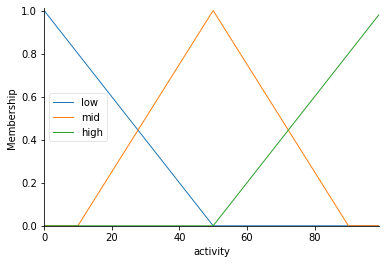

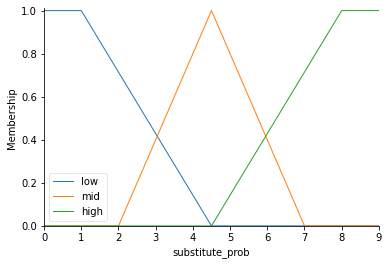

In [8]:
scoring.view()
activity.view()
substitute_prob.view()

Se definen las reglas

In [9]:
rule1 = ctrl.Rule(scoring['high'] & activity['high'], substitute_prob['low'])
rule2 = ctrl.Rule(scoring['mid'] & activity['high'], substitute_prob['mid'])
rule3 = ctrl.Rule(scoring['low'] & activity['high'], substitute_prob['high'])
rule4 = ctrl.Rule(scoring['high'] & activity['mid'], substitute_prob['low'])
rule5 = ctrl.Rule(scoring['mid'] & activity['mid'], substitute_prob['mid'])
rule6 = ctrl.Rule(scoring['low'] & activity['mid'], substitute_prob['mid'])
rule7 = ctrl.Rule(scoring['high'] & activity['low'], substitute_prob['low'])
rule8 = ctrl.Rule(scoring['mid'] & activity['low'], substitute_prob['mid'])
rule9 = ctrl.Rule(scoring['low'] & activity['low'], substitute_prob['high'])

Se configura el sistema

In [10]:
substitution_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8,rule9])

In [11]:
substitution_comp = ctrl.ControlSystemSimulation(substitution_ctrl)


In [12]:
def show_score(section):
    substitution_comp.input['scoring'] = events.loc[section,'scoring']
    substitution_comp.input['activity'] = events.loc[section,'hr_max_percentage']

    # Crunch the numbers
    substitution_comp.compute()

    print(f'scoring: {events.loc[section,"scoring"]}, activity: {events.loc[section,"hr_max_percentage"]}')
    print (substitution_comp.output['substitute_prob'])
    substitute_prob.view(sim=substitution_comp)

scoring: 3, activity: 97.25
2.737489397794743


/home/jvillamor10/.local/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


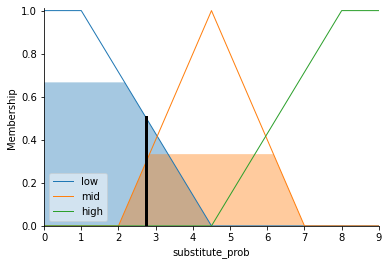

In [13]:
show_score(0)

scoring: 5, activity: 87.13
1.6881725387575706


/home/jvillamor10/.local/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


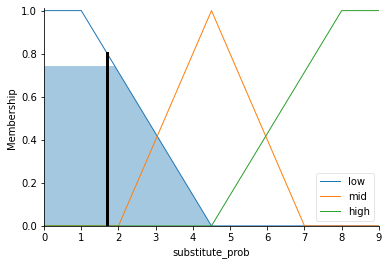

In [14]:
show_score(1)

scoring: 0, activity: 42.73
4.932505170118133


/home/jvillamor10/.local/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


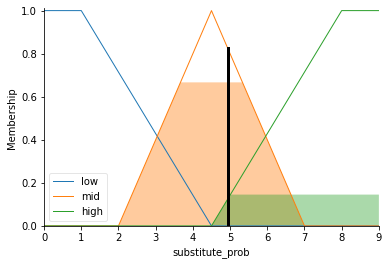

In [15]:
show_score(4)

scoring: -1, activity: 0.0
6.262510602205259


/home/jvillamor10/.local/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


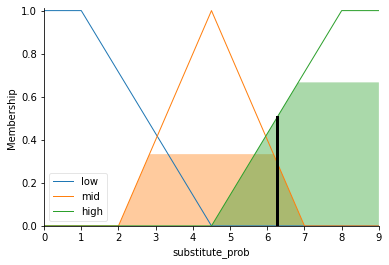

In [16]:
show_score(6)